## Assignment

In this assignment, you'll continue working with the [U.S. Education Dataset](https://www.kaggle.com/noriuk/us-education-datasets-unification-project/home) from Kaggle. The data gives detailed state level information on the several facets of the state of education on an annual basis. To learn more about the data and the column descriptions, you can view the Kaggle link above. You should access the data from the Thinkful database. Here's the credentials you can use to connect to the database:

postgres_user = 'dsbc_student'<br>
postgres_pw = '7\*.8G9QH21'<br>
postgres_host = '142.93.121.174'<br>
postgres_port = '5432'<br>
postgres_db = 'useducation'<br>

Don't forget to apply the most suitable missing value filling techniques you applied in the previous checkpoint to the data. You're supposed to provide your answers to the following questions after you handled the missing values.

To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

1. Derive the descriptive statistics of the data and discuss the points you find remarkable.
2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.
3. In your chosen state, which of the lessons are the students more successful, math or reading?
4. What are the distributions of the math and reading scores in the sample?
5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas_profiling
from sqlalchemy import create_engine
import warnings 

warnings.filterwarnings('ignore')

In [21]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu = pd.read_sql_query('select * from useducation',con=engine)

engine.dispose()

edu.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [22]:
#replace missing value by the mean of that year 
edu3 = edu.copy()

fill_list = ["ENROLL", "TOTAL_REVENUE", "FEDERAL_REVENUE", 
             "STATE_REVENUE", "LOCAL_REVENUE", "TOTAL_EXPENDITURE", 
             "INSTRUCTION_EXPENDITURE", "SUPPORT_SERVICES_EXPENDITURE",
             "OTHER_EXPENDITURE", "CAPITAL_OUTLAY_EXPENDITURE", "GRADES_PK_G", 
             "GRADES_KG_G", "GRADES_4_G", "GRADES_8_G", "GRADES_12_G", "GRADES_1_8_G", 
             "GRADES_9_12_G", "GRADES_ALL_G"]

for col in fill_list:
    edu3[col] = edu3[col].fillna(edu3.groupby('YEAR')[col].transform('mean'))

### 1. Derive the descriptive statistics of the data and discuss the points you find remarkable.

+ I noticed that there are a lot of missing values in the test score variables. 
+ The mean of total revenue is slightly less than total expenditure, meaning that states run budget deficit on education on average. 
+ Instruction expenditure makes up more than half of the total expenditure on education. 
+ State revenue is the major source of revenue on average. 
+ Average math scores are higher than average reading scores at both grade levels, however, the standard deviations are also higher than that of the average reading scores. 

In [23]:
edu3.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.385000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.441000e+03,1.385000e+03,...,1390.000000,1390.000000,1390.000000,1.390000e+03,1.390000e+03,1.390000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.161654e+05,9.084108e+06,7.662749e+05,4.213597e+06,4.104236e+06,9.190557e+06,4.758243e+06,2.677770e+06,4.286507e+05,...,64590.152441,64331.744106,54418.075582,5.196200e+05,2.474932e+05,8.029178e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.003532e+06,1.110204e+07,1.085057e+06,5.237195e+06,5.181475e+06,1.132084e+07,5.947042e+06,3.170760e+06,5.041013e+05,...,79451.944548,78083.976028,67187.337112,6.368932e+05,3.044943e+05,9.456162e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.000000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.867590e+05,2.425600e+06,2.068530e+05,1.319582e+06,8.747060e+05,2.427316e+06,1.306105e+06,7.350360e+05,1.199340e+05,...,14190.500000,13698.250000,11161.750000,1.129712e+05,5.270300e+04,1.939785e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,7.374010e+05,5.778507e+06,4.461800e+05,2.857497e+06,2.398344e+06,5.858385e+06,3.033016e+06,1.720824e+06,3.070220e+05,...,44909.500000,44756.500000,37541.500000,3.611705e+05,1.706525e+05,5.983920e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,9.624880e+05,1.116863e+07,8.956420e+05,5.187230e+06,4.995971e+06,1.116970e+07,5.672620e+06,3.333043e+06,5.223475e+05,...,75149.750000,75016.250000,67026.000000,6.052242e+05,2.888522e+05,9.045562e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


### 2. Choose a state (e.g. California) and draw a line graph of its total revenues and total expenditures along the years. How do these 2 variables evolve during the years? Try to explain the peaks and troughs with some state-wise news and information around those dates.

+ Drop of both revenue and expenditure in 1994: Northridge earthquake
+ Drop of revenue in 2010: ?
+ Drop of both in 2013: wildfires

In [24]:
ca = edu3[edu3['STATE'] == 'CALIFORNIA']

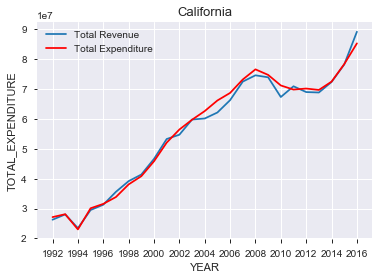

In [25]:
ax = sns.lineplot(x="YEAR", y="TOTAL_REVENUE", data=ca, label='Total Revenue')
ax = sns.lineplot(x="YEAR", y="TOTAL_EXPENDITURE", data=ca, color="red", label='Total Expenditure')

plt.title("California", fontsize=13)
plt.xticks(np.arange(1992, 2017, 2))
plt.show()

### 3. In your chosen state, which of the lessons are the students more successful, math or reading?

As we can see from the boxplot, students in CA are more proficient in math than reading. 

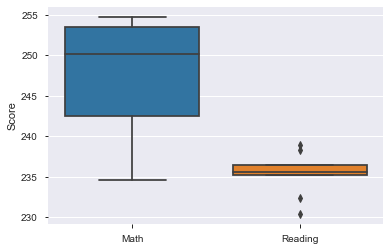

In [26]:
ca['Math'] = (ca['AVG_MATH_4_SCORE'] + ca['AVG_MATH_8_SCORE'])/2
ca['Reading'] = (ca['AVG_READING_4_SCORE'] + ca['AVG_READING_8_SCORE'])/2

score = ca[['Math', 'Reading']]
sns.boxplot(x="variable", y="value", data=pd.melt(score))
plt.ylabel("Score")
plt.xlabel("")

plt.show()

### 4. What are the distributions of the math and reading scores in the sample?

All test scores follow a negatively skewed distribution, meaning that average of the scores are lower than the median. 

In [27]:
test_list = ["AVG_MATH_4_SCORE", "AVG_MATH_8_SCORE", "AVG_READING_4_SCORE", "AVG_READING_8_SCORE"]
for col in test_list:
    edu3[col] = pd.to_numeric(edu3[col], errors='coerce')
    edu6 = edu3.dropna(subset=[col])
    edu6[col] = edu6[col].astype(int)
    
edu6 = edu6.dropna()

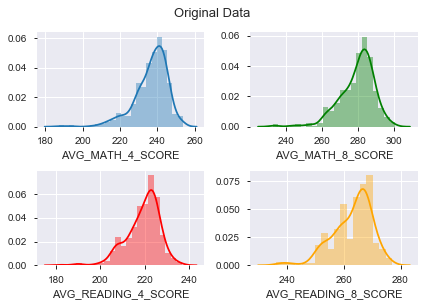

In [29]:
plt.subplot(2,2,1)
sns.distplot(edu6['AVG_MATH_4_SCORE'])

plt.subplot(2,2,2)
sns.distplot(edu6['AVG_MATH_8_SCORE'], color='green')

plt.subplot(2,2,3)
sns.distplot(edu6['AVG_READING_4_SCORE'], color='red')

plt.subplot(2,2,4)
sns.distplot(edu6['AVG_READING_8_SCORE'], color='orange')

plt.suptitle("Original Data", fontsize=13, y=1.05)
plt.tight_layout()
plt.show()

### 5. Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then compare the effects of these techniques on the distributions of the score variables. 

In comparison, interpolation has the least effect on the original data. 

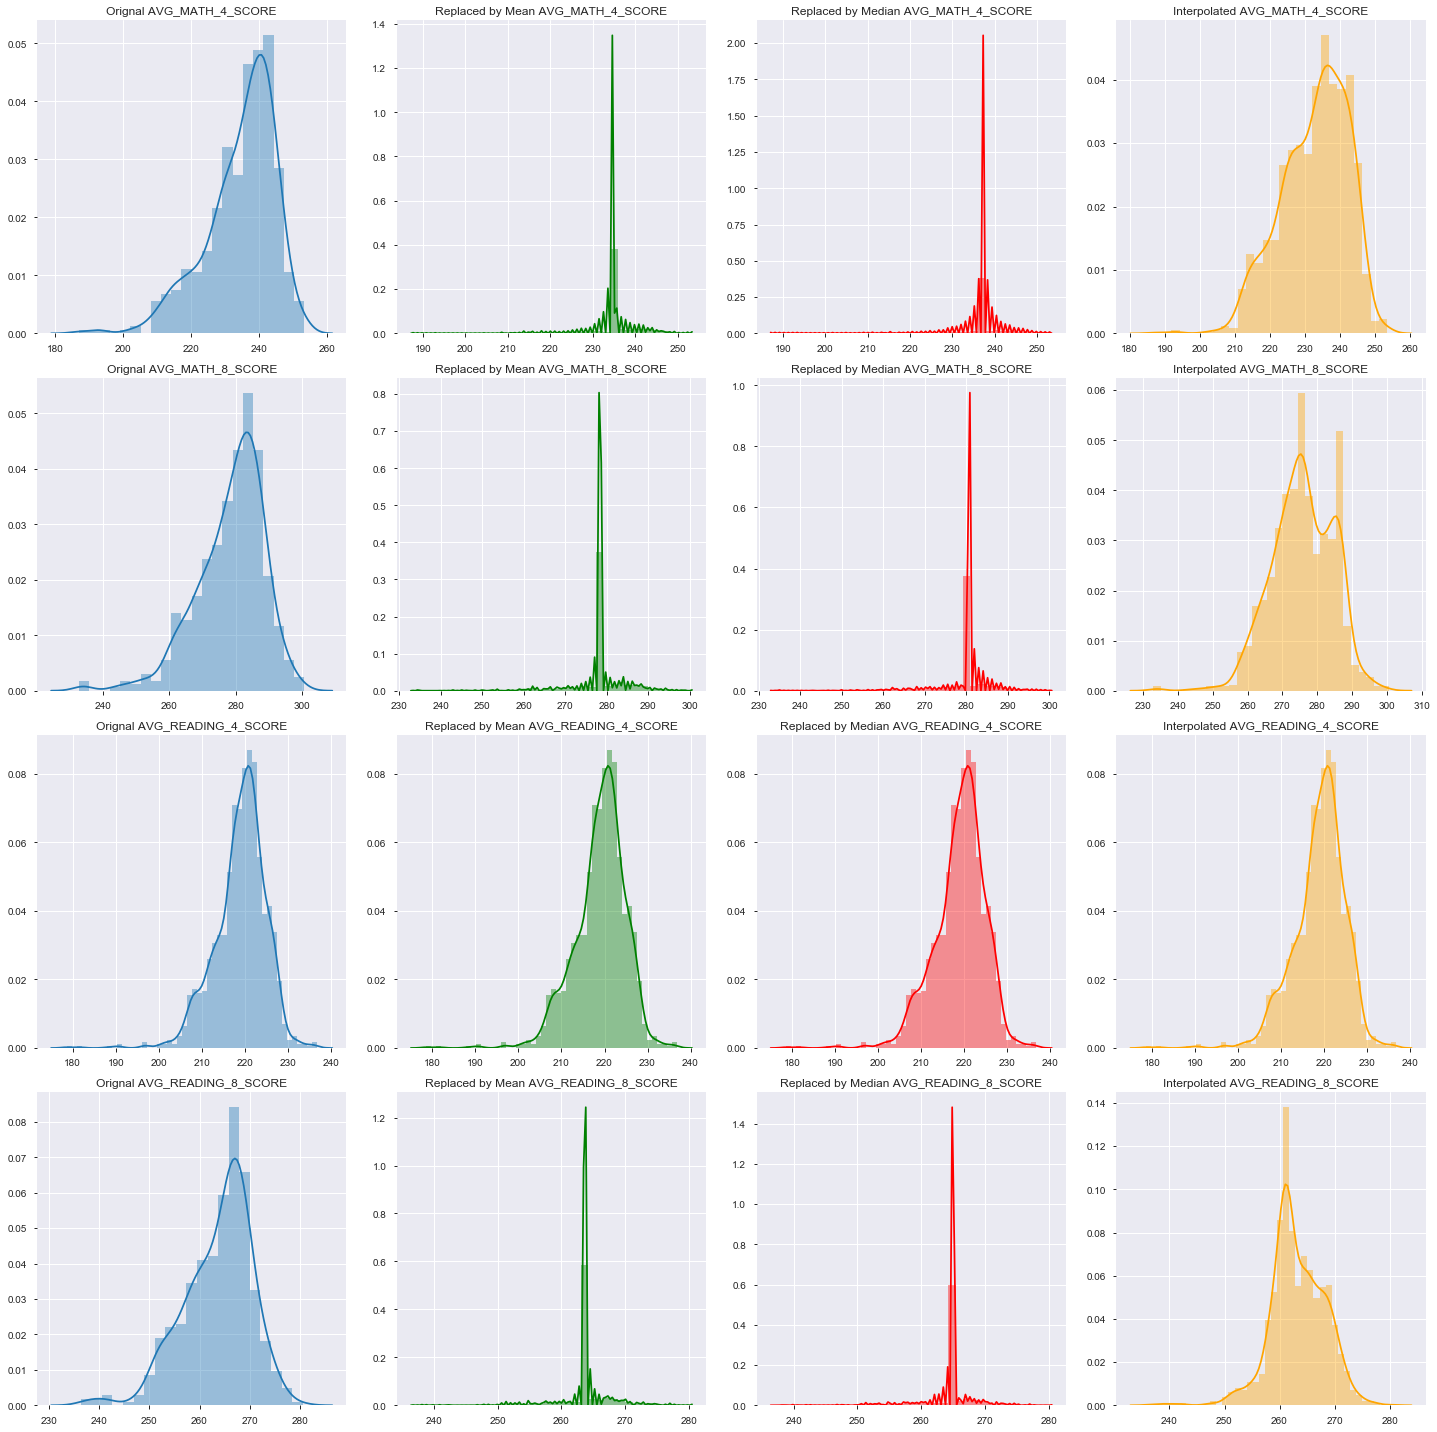

In [46]:
plt.figure(figsize=(20,20))
#math4
plt.subplot(4,4,1)
sns.distplot(edu3['AVG_MATH_4_SCORE'].dropna())
plt.title("Orignal {}".format("AVG_MATH_4_SCORE"))
plt.xlabel("")

plt.subplot(4,4,2)
sns.distplot(edu3['AVG_MATH_4_SCORE'].fillna(edu3['AVG_MATH_4_SCORE'].mean()), color='green')
plt.title("Replaced by Mean {}".format("AVG_MATH_4_SCORE"))
plt.xlabel("")

plt.subplot(4,4,3)
sns.distplot(edu3['AVG_MATH_4_SCORE'].fillna(edu3['AVG_MATH_4_SCORE'].median()), color='red')
plt.title("Replaced by Median {}".format("AVG_MATH_4_SCORE"))
plt.xlabel("")

plt.subplot(4,4,4)
sns.distplot(edu3['AVG_MATH_4_SCORE'].interpolate(), color='orange')
plt.title("Interpolated {}".format("AVG_MATH_4_SCORE"))
plt.xlabel("")

#math8
plt.subplot(4,4,5)
sns.distplot(edu3['AVG_MATH_8_SCORE'].dropna())
plt.title("Orignal {}".format("AVG_MATH_8_SCORE"))
plt.xlabel("")

plt.subplot(4,4,6)
sns.distplot(edu3['AVG_MATH_8_SCORE'].fillna(edu3['AVG_MATH_8_SCORE'].mean()), color='green')
plt.title("Replaced by Mean {}".format("AVG_MATH_8_SCORE"))
plt.xlabel("")

plt.subplot(4,4,7)
sns.distplot(edu3['AVG_MATH_8_SCORE'].fillna(edu3['AVG_MATH_8_SCORE'].median()), color='red')
plt.title("Replaced by Median {}".format("AVG_MATH_8_SCORE"))
plt.xlabel("")

plt.subplot(4,4,8)
sns.distplot(edu3['AVG_MATH_8_SCORE'].interpolate(), color='orange')
plt.title("Interpolated {}".format("AVG_MATH_8_SCORE"))
plt.xlabel("")

#reading4
plt.subplot(4,4,9)
sns.distplot(edu3['AVG_READING_4_SCORE'].dropna())
plt.title("Orignal {}".format("AVG_READING_4_SCORE"))
plt.xlabel("")

plt.subplot(4,4,10)
sns.distplot(edu3['AVG_READING_4_SCORE'].fillna(edu3['AVG_READING_4_SCORE'].mean()), color='green')
plt.title("Replaced by Mean {}".format("AVG_READING_4_SCORE"))
plt.xlabel("")

plt.subplot(4,4,11)
sns.distplot(edu3['AVG_READING_4_SCORE'].fillna(edu3['AVG_READING_4_SCORE'].median()), color='red')
plt.title("Replaced by Median {}".format("AVG_READING_4_SCORE"))
plt.xlabel("")

plt.subplot(4,4,12)
sns.distplot(edu3['AVG_READING_4_SCORE'].interpolate(), color='orange')
plt.title("Interpolated {}".format("AVG_READING_4_SCORE"))
plt.xlabel("")

#reading8
plt.subplot(4,4,13)
sns.distplot(edu3['AVG_READING_8_SCORE'].dropna())
plt.title("Orignal {}".format("AVG_READING_8_SCORE"))
plt.xlabel("")

plt.subplot(4,4,14)
sns.distplot(edu3['AVG_READING_8_SCORE'].fillna(edu3['AVG_READING_8_SCORE'].mean()), color='green')
plt.title("Replaced by Mean {}".format("AVG_READING_8_SCORE"))
plt.xlabel("")

plt.subplot(4,4,15)
sns.distplot(edu3['AVG_READING_8_SCORE'].fillna(edu3['AVG_READING_8_SCORE'].median()), color='red')
plt.title("Replaced by Median {}".format("AVG_READING_8_SCORE"))
plt.xlabel("")

plt.subplot(4,4,16)
sns.distplot(edu3['AVG_READING_8_SCORE'].interpolate().dropna(), color='orange')
plt.title("Interpolated {}".format("AVG_READING_8_SCORE"))
plt.xlabel("")
#plt.suptitle("Replace Missing Values by State Mean", fontsize=13, y=1.05)

plt.tight_layout()
plt.show()